In [2]:
!pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [5]:
base  = "https://raw.githubusercontent.com/gedeck/"
base += "practical-statistics-for-data-scientists/master/data/"

In [6]:
STATE_CSV = "state.csv"
state = pd.read_csv(f"{base}{STATE_CSV}")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [7]:
state["Population"].mean()

6162876.3

In [8]:
trim_mean(state["Population"], 0.1)

4783697.125

In [9]:
state["Population"].median()

4436369.5

In [10]:
state["Murder.Rate"].mean()

4.066

In [11]:
np.average(state["Murder.Rate"], weights=state["Population"])

4.445833981123393

In [12]:
state["Population"].std()

6848235.347401142

In [13]:
state["Population"].quantile(0.75) - state["Population"].quantile(0.25)

4847308.0

# Box plots

In [14]:
state["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [16]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]

df = pd.DataFrame(state["Murder.Rate"].quantile(percentages))
df.index = [f"{p*100}%" for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


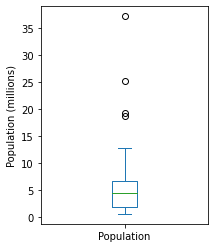

In [17]:
ax = (state["Population"]/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel("Population (millions)")

plt.show()

In [18]:
binnedPopulation = pd.cut(state["Population"], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [20]:
binnedPopulation.name = "binnedPopulation"
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by="Population")

groups = []
for group, subset in df.groupby(by="binnedPopulation"):
    groups.append({
        "BinRange": group,
        "Count": len(subset),
        "States": ",".join(subset.Abbreviation)
    })
pd.DataFrame(groups)

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


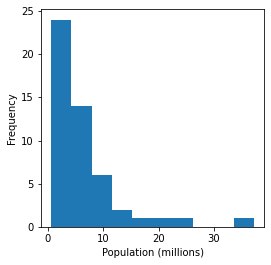

In [21]:
ax = (state["Population"] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel("Population (millions)")

plt.show()

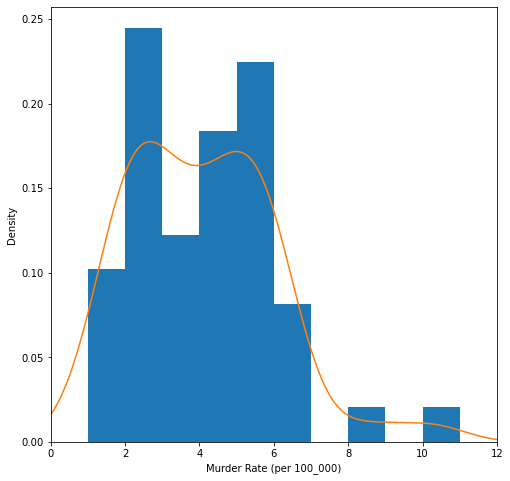

In [23]:
ax = state["Murder.Rate"].plot.hist(density=True, xlim=[0, 12],
                                    bins=range(1, 12), figsize=(8, 8))
state["Murder.Rate"].plot.density(ax=ax)
ax.set_xlabel("Murder Rate (per 100_000)")

plt.show()

In [24]:
AIRPORT_DELAYS_CSV = f"{base}dfw_airline.csv"
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


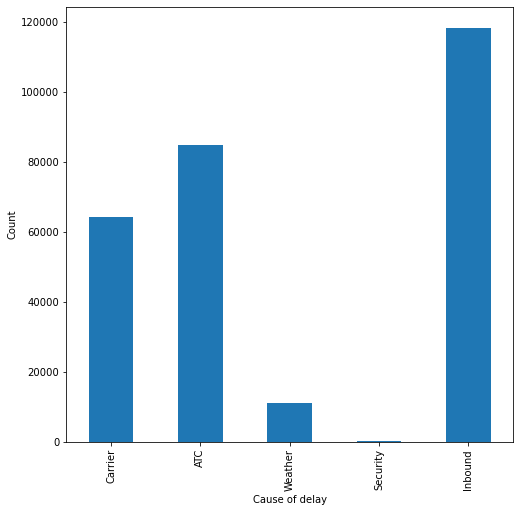

In [25]:
ax = dfw.transpose().plot.bar(figsize=(8, 8), legend=False)
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

plt.show()

In [26]:
SP500_DATA_CSV = f"{base}sp500_data.csv.gz"
SP500_SECTORS_CSV = f"{base}sp500_sectors.csv"

In [27]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [29]:
len(sp500_sym)

517

In [28]:
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [30]:
etfs = sp500_px.loc[sp500_px.index > "2012-07-01",
                   sp500_sym[sp500_sym["sector"] == "etf"]["symbol"]]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


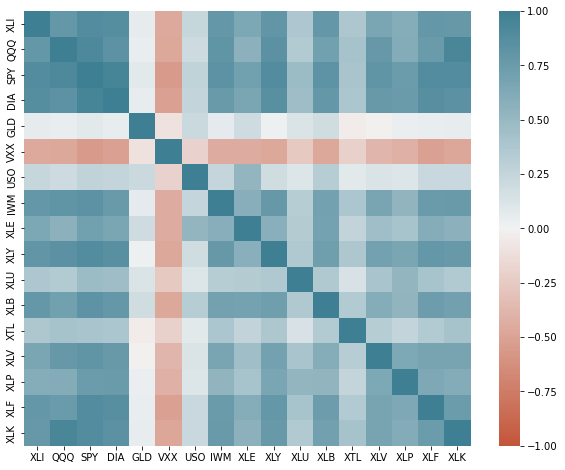

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.show()